# Chapter 15 in chapter exercises

In [2]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 15.1: Geometric view of regression

In [4]:
# data
N = 9
x = np.linspace(-1,4,N)
y = 1 + x + np.random.randn(N)

# get GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

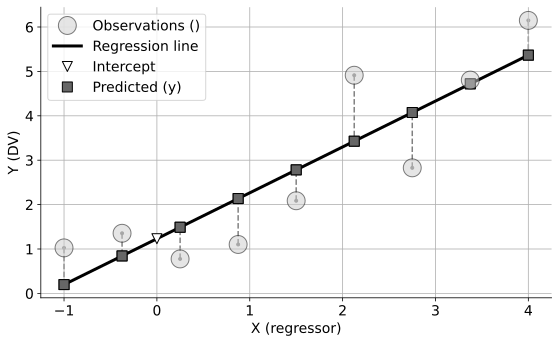

In [5]:
_,axs = plt.subplots(1,1,figsize=(8,5))

# plot the data
axs.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5,label='Observations ()')
axs.set(xlabel='X (regressor)',ylabel='Y (DV)')

# plot the regression line
axs.plot(x,yHat,'k-',linewidth=3,label='Regression line')

# plot the intercept
intpnt = mdl.predict([1,0])
axs.plot(0,intpnt,'kv',markersize=10,markerfacecolor='w',label='Intercept',zorder=10)


# data-point-specific projection lines
for i in range(N):
  axs.plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)
  axs.plot([x[i],x[i]],[yHat[i],yHat[i]],'ks',markersize=10,markerfacecolor=(.4,.4,.4),label=r'Predicted (y)')


# add the residuals
labh,labels = axs.get_legend_handles_labels() # to prevent redundant 'Predicted' labels
axs.legend(labh[:4],labels[:4]) # only the first four (unique) legends
axs.grid()

# display the figure
plt.tight_layout()
plt.show()

### Fig 15.2: Regression vs. PCA

In [6]:
# data
N = 10
x = np.linspace(-1.5,1.5,N)
y = x + np.random.randn(N)

# mean-center variables
y -= np.mean(y)
maxval = np.max(np.abs(y))*1.1 # for axis scaling; PCA projections look orthogonal in square axes

# get GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

# compute PCA
data = np.vstack((x,y)).T
C = np.cov(data.T)
evals,evecs = np.linalg.eig(C)
PC = evecs[:,np.argmax(evals)]

# projection points
pcaX = np.zeros(N)
pcaY = np.zeros(N)

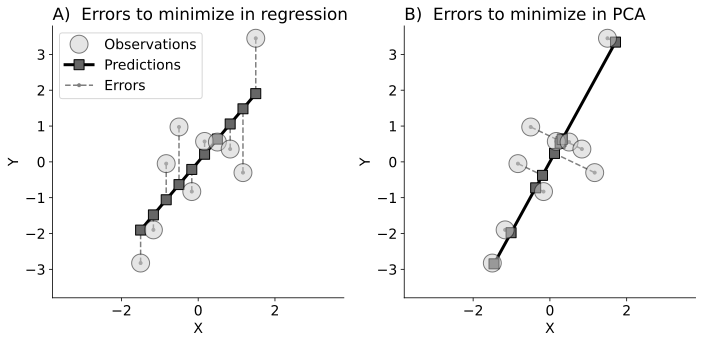

In [7]:
_,axs = plt.subplots(1,2,figsize=(10,5))

# plot the data
for a in axs:
  a.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5)
  a.set(xlabel='X',ylabel='Y',xlim=[-maxval,maxval],ylim=[-maxval,maxval])

# plot the regression line
axs[0].plot(x,yHat,'ks-',linewidth=3,markersize=10,markerfacecolor=(.4,.4,.4))


# data-point-specific projection lines
for i in range(N):

  # regression is the projection onto the best fit line, holding 'x' constant
  axs[0].plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)

  # compute and plot the PCA projection lines
  pcaX[i],pcaY[i] = data[i,:]@PC*PC
  axs[1].plot([x[i],pcaX[i]],[y[i],pcaY[i]],'--.',color='gray',zorder=-4)


# now plot the PCA line
axs[1].plot(pcaX,pcaY,'ks-',linewidth=3,markersize=10,markerfacecolor=(.4,.4,.4))


# final adjustments
axs[0].set_title(r'A)  Errors to minimize in regression')
axs[0].legend(['Observations','Predictions','Errors'])

axs[1].set_title(r'B)  Errors to minimize in PCA')


plt.tight_layout()
plt.show()

### Fig 15.3

In [8]:
# the data
icecream  = np.array([ 1, 2, 4, 5, 7 ])
happiness = np.array([ 5, 6.5, 6, 8, 9 ])

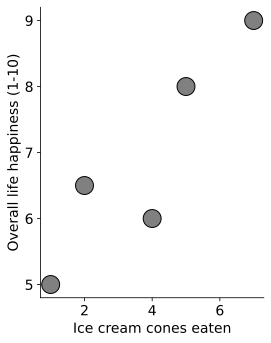

In [9]:
plt.figure(figsize=(4,5))
plt.plot(icecream,happiness,'ko',markerfacecolor='gray',markersize=18)
plt.xlabel('Ice cream cones eaten')
plt.ylabel('Overall life happiness (1-10)')
plt.yticks(range(5,10))

plt.tight_layout()
plt.show()

In [10]:
# regression

# organize the IVs into a design matrix
designMatrix = np.vstack((
    np.ones(5,),  # intercept
    icecream      # number of ice cream cones eaten
    )).T

# list of labels for model output
IVnames = ['Intercept','Ice Cream']

# evaluate the regression model (endog=DV, exog=IVs)
regResults = sm.OLS(happiness,designMatrix).fit()

# and print a summary of the results
t = regResults.summary(xname=IVnames,yname='Happiness')
t.as_text

/home/akanksha/Documents/Stuff/Projects/Code_Py/modern_statistics_book/svenv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     14.73
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0312
Time:                        22:53:24   Log-Likelihood:                -4.4354
No. Observations:                   5   AIC:                             12.87
Df Residuals:                       3   BIC:                             12.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Fig 15.4: geometry of regression

In [11]:
# data
N = 9
x = np.linspace(-1,4,N)
y = 1 + x + np.random.randn(N)

# GLM predictions
mdl = sm.OLS(y,sm.add_constant(x)).fit()
yHat = mdl.predict(sm.add_constant(x))

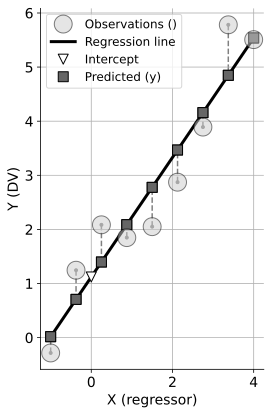

In [12]:
_,axs = plt.subplots(1,1,figsize=(4,6))

# plot the data
axs.plot(x,y,'ko',markerfacecolor=(.8,.8,.8),markersize=18,zorder=10,alpha=.5,label='Observations ()')
axs.set(xlabel='X (regressor)',ylabel='Y (DV)')

# plot the regression line
axs.plot(x,yHat,'k-',linewidth=3,label='Regression line')

# plot the intercept
intpnt = mdl.predict([1,0])
axs.plot(0,intpnt,'kv',markersize=10,markerfacecolor='w',label='Intercept',zorder=10)


# data-point-specific projection lines
for i in range(N):
  axs.plot([x[i],x[i]],[y[i],yHat[i]],'--.',color='gray',zorder=-4)
  axs.plot([x[i],x[i]],[yHat[i],yHat[i]],'ks',markersize=10,markerfacecolor=(.4,.4,.4),label=r'Predicted (y)')


# add the residuals
labh,labels = axs.get_legend_handles_labels() # to prevent redundant 'Predicted' labels
axs.legend(labh[:4],labels[:4],fontsize=12) # only the first four (unique) legends
axs.grid()

# display the figure
plt.tight_layout()
plt.show()

### Fig 15.6: Simulating regression data- example 1

In [13]:
# coefficients for linking the IV to the DV
B0 = 50  # intercept (cm)
B1 =  6  # coefficient for change in age (cm)

# number of observations
N = 135

# the independent variable
age = np.random.uniform(0,20,N)

# the noise
noise = np.random.normal(0,15,N)

# put it together to simulate the data
height = B0 + B1*age + noise


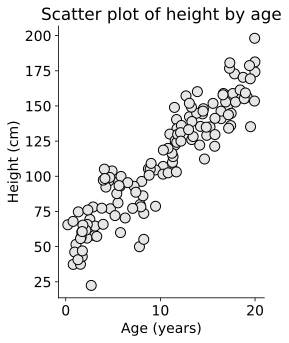

In [14]:
# plot
plt.figure(figsize=(4,5))

plt.plot(age,height,'ko',markerfacecolor=(.9,.9,.9),markersize=10)
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.title('Scatter plot of height by age',loc='center')

# display the figure
plt.tight_layout()
plt.show()

In [15]:
# regression

# organize the IVs into a design matrix
designMatrix = np.vstack((
    np.ones(N,),  # intercept
    age           # age IV
    )).T

# list of labels for model output
IVnames = ['Intercept','Age']

# evaluate the regression model (endog=DV, exog=IVs)
regResults = sm.OLS(endog=height, exog=designMatrix).fit()

# print a summary of the results
t = regResults.summary(xname=IVnames, yname='Height')
t.as_text

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     769.6
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.70e-57
Time:                        22:53:25   Log-Likelihood:                -557.29
No. Observations:                 135   AIC:                             1119.
Df Residuals:                     133   BIC:                             1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### Fig 15.7: Visualizing the regression data

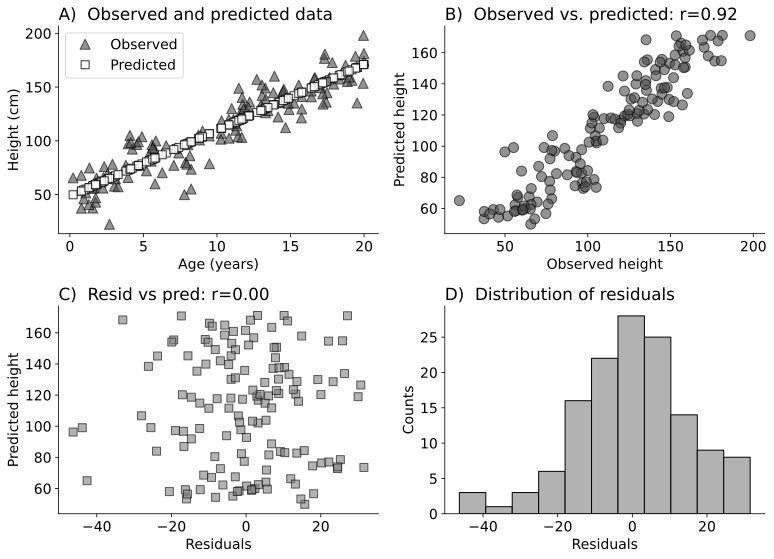

In [16]:
# plot the predicted data
yHat = regResults.predict()
resid = regResults.resid


_,axs = plt.subplots(2,2,figsize=(11,8))

axs[0,0].plot(age,height,'k^',markerfacecolor=(.3,.3,.3),alpha=.6,markersize=10,label='Observed')
axs[0,0].plot(age,yHat,'ks',markerfacecolor='w',alpha=.8,markersize=8,label='Predicted')
axs[0,0].set(xlabel='Age (years)',ylabel='Height (cm)')
axs[0,0].set_title(fr'A)  Observed and predicted data')
axs[0,0].legend()

axs[0,1].plot(height,yHat,'ko',markerfacecolor=(.3,.3,.3),alpha=.6,markersize=10)
axs[0,1].set(xlabel='Observed height',ylabel='Predicted height')
axs[0,1].set_title(fr'B)  Observed vs. predicted: r={np.corrcoef(height,yHat)[0,1]:.2f}')

axs[1,0].plot(resid,yHat,'ks',markerfacecolor=(.5,.5,.5),alpha=.6,markersize=8)
axs[1,0].set(xlabel='Residuals',ylabel='Predicted height')
axs[1,0].set_title(fr'C)  Resid vs pred: r={np.corrcoef(resid,yHat)[0,1]:.2f}')

axs[1,1].hist(resid,bins='fd',edgecolor='k',facecolor=(.7,.7,.7))
axs[1,1].set(xlabel='Residuals',ylabel='Counts')
axs[1,1].set_title(fr'D)  Distribution of residuals')


plt.tight_layout()
plt.show()
     